In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import StratifiedKFold 
import catboost as cb
import matplotlib.pyplot as plt
%matplotlib inline

/home/firehawk/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
TrainDataPath = 'train_jqd04QH.csv'
TestDataPath = 'test_GYi4Gz5.csv'
SubDataPath = 'sample_submission_sxfcbdx.csv'


# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)
SubPath = pd.read_csv(SubDataPath)

In [3]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(18359, 14)


Training Dataset Columns/Features:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [4]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(15021, 13)


Test Dataset Columns/Features:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [6]:
# Now Checking For Any Missing Values# Now Ch 
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64


Test Dataset Missing Value Columns:
enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64


In [7]:
# checking missing data percentage in train data
total = TrainData.isnull().sum().sort_values(ascending = False)
percent = (TrainData.isnull().sum()/TrainData.isnull().count()*100).sort_values(ascending = False)
missing_TrainData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TrainData.head(30)

,Total,Percent
company_type,5039,27.447029
company_size,4779,26.030830
gender,4098,22.321477
major_discipline,2838,15.458358
education_level,457,2.489242
last_new_job,367,1.999020
enrolled_university,342,1.862847
experience,59,0.321368
target,0,0.000000
training_hours,0,0.000000


In [8]:
# checking missing data percentage in test data
total = TestData.isnull().sum().sort_values(ascending = False)
percent = (TestData.isnull().sum()/TestData.isnull().count()*100).sort_values(ascending = False)
missing_TestData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TestData.head(30)

,Total,Percent
company_type,4330,28.826310
company_size,4051,26.968910
gender,3388,22.555090
major_discipline,2393,15.931030
education_level,395,2.629652
last_new_job,304,2.023833
enrolled_university,279,1.857400
experience,44,0.292923
training_hours,0,0.000000
relevent_experience,0,0.000000


In [19]:
TrainData["city_no"] = TrainData["city"].str[5:].astype(int)
TestData["city_no"] = TestData["city"].str[5:].astype(int)

In [20]:
train = TrainData.copy()
test = TestData.copy()

In [21]:
train["company_type"].fillna(-99, inplace=True)
train["company_size"].fillna(-99, inplace=True)
train["gender"].fillna(-99, inplace=True)
train["major_discipline"].fillna(-99, inplace=True)
train["education_level"].fillna(-99, inplace=True)
train["last_new_job"].fillna(-99, inplace=True)
train["enrolled_university"].fillna(-99, inplace=True)
train["experience"].fillna(0, inplace=True)

test["company_type"].fillna(-99, inplace=True)
test["company_size"].fillna(-99, inplace=True)
test["gender"].fillna(-99, inplace=True)
test["major_discipline"].fillna(-99, inplace=True)
test["education_level"].fillna(-99, inplace=True)
test["last_new_job"].fillna(-99, inplace=True)
test["enrolled_university"].fillna(-99, inplace=True)
test["experience"].fillna(0, inplace=True)

# VISUALIZATION

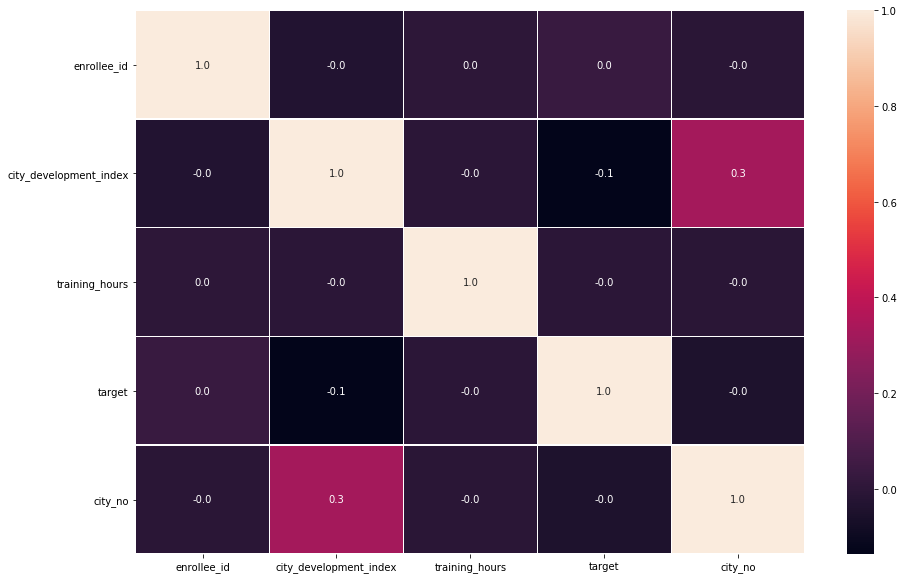

In [22]:
# TRAIN DATA`
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

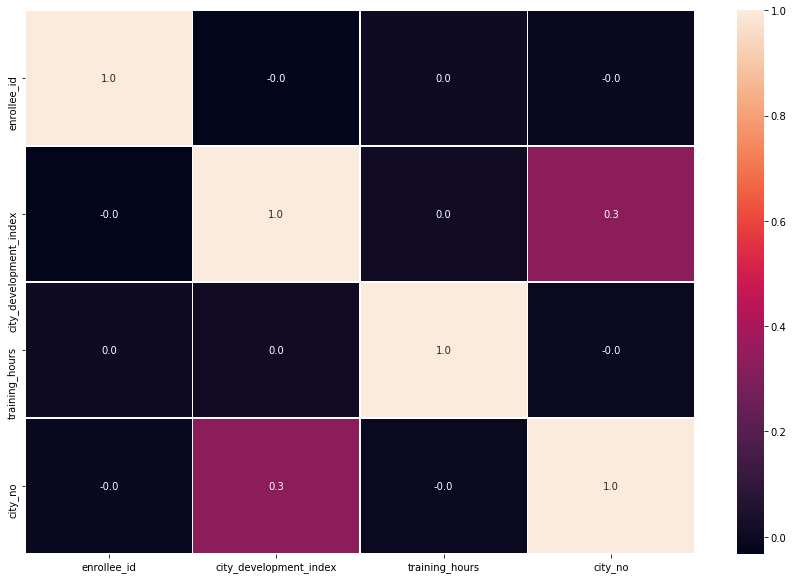

In [23]:
# TEST DATA
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

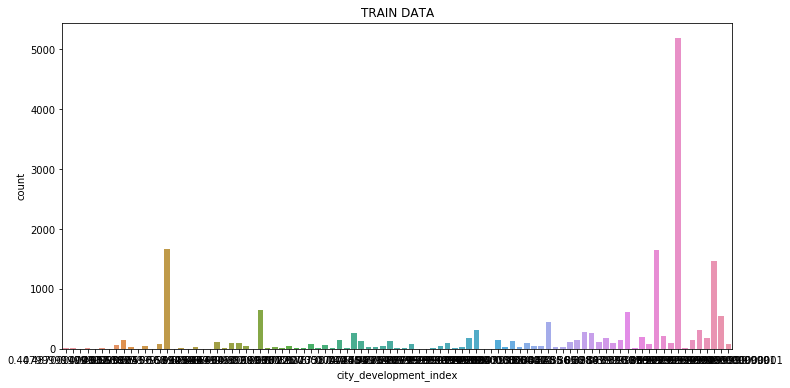

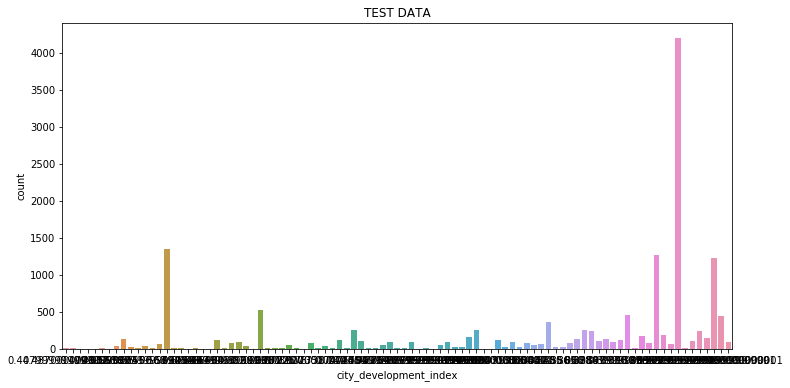

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(train["city_development_index"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["city_development_index"])
plt.title('TEST DATA')
plt.show()

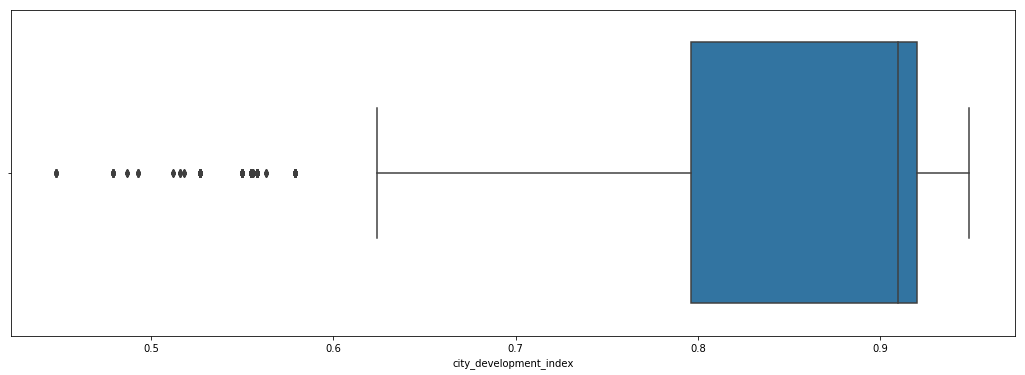

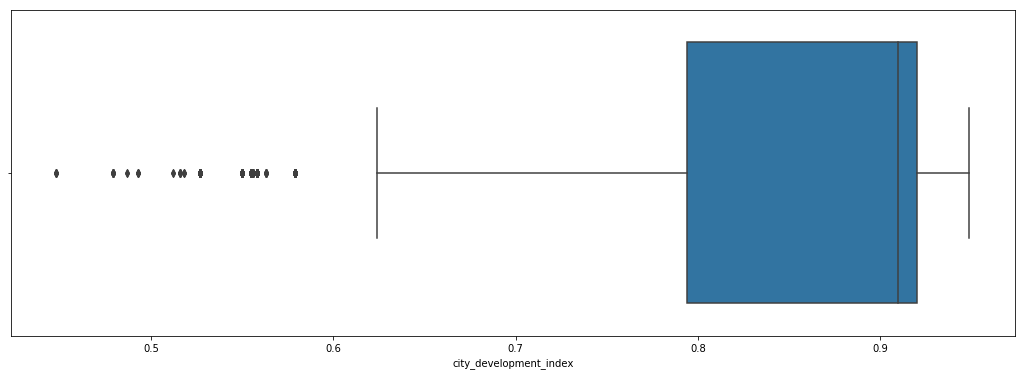

In [25]:
plt.figure(figsize=(18, 6))
sns.boxplot(train["city_development_index"])
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(test["city_development_index"])
plt.show()

In [26]:
q75, q25 = np.percentile(train.city_development_index.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.6)
max = q75 + (iqr*1.6)

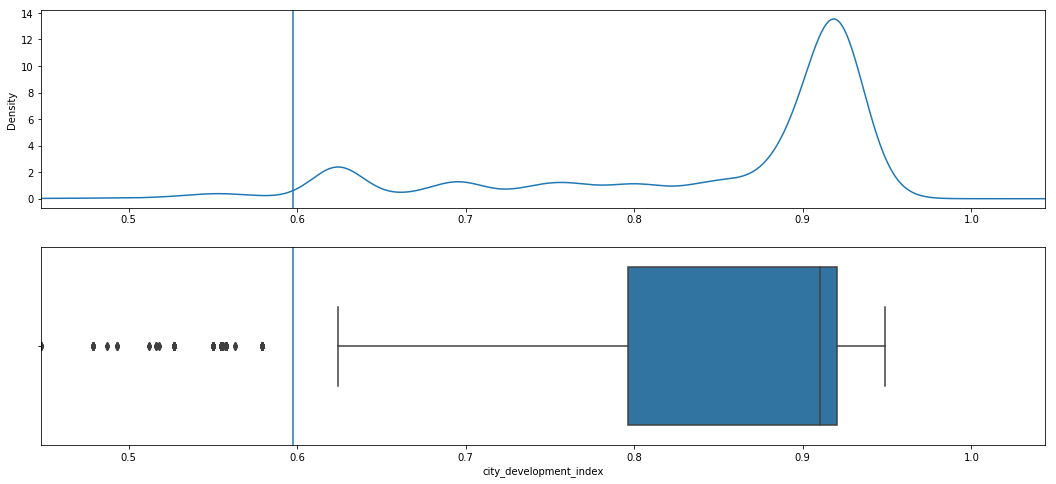

In [27]:
i = 'city_development_index'
 
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.xlim(train[i].min(), train[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = train[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(train[i].min(), train[i].max()*1.1)
sns.boxplot(x=train[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [28]:
train.loc[train['city_development_index'] < min, 'city_development_index'] = train["city_development_index"].median()

In [29]:
q75, q25 = np.percentile(test.city_development_index.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.6)
max = q75 + (iqr*1.6)

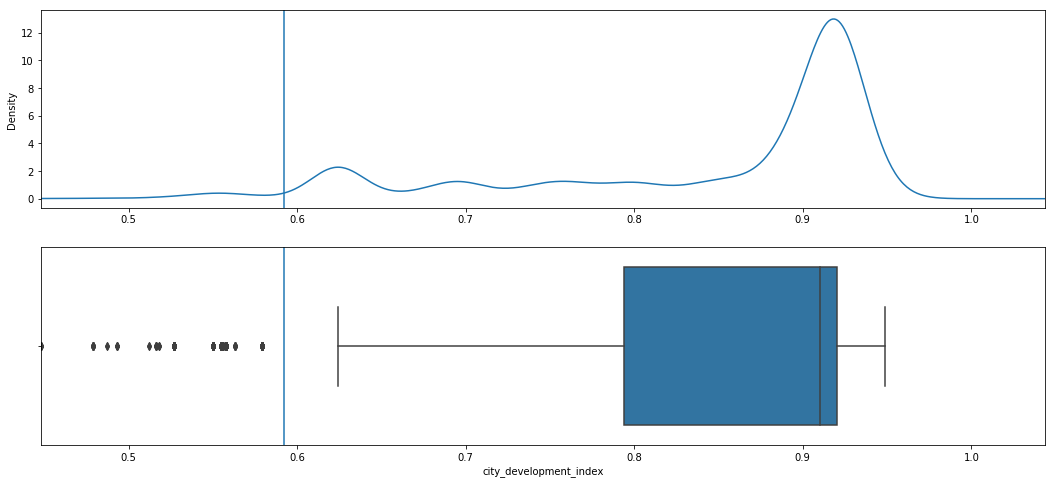

In [30]:
i = 'city_development_index'
 
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.xlim(test[i].min(), test[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = test[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(test[i].min(), test[i].max()*1.1)
sns.boxplot(x=test[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [31]:
test.loc[test['city_development_index'] < min, 'city_development_index'] = test["city_development_index"].median()

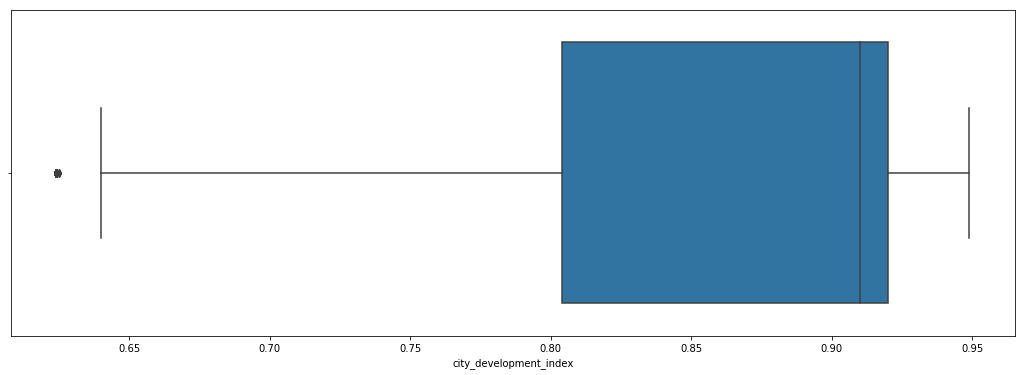

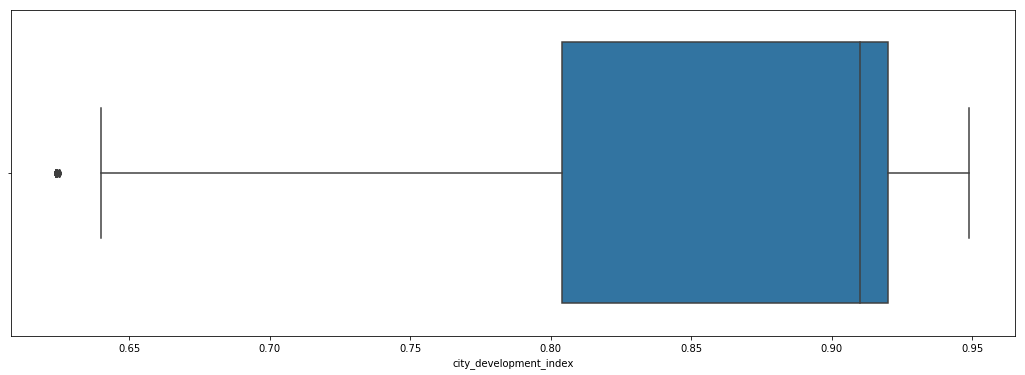

In [32]:
plt.figure(figsize=(18, 6))
sns.boxplot(train["city_development_index"])
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(test["city_development_index"])
plt.show()

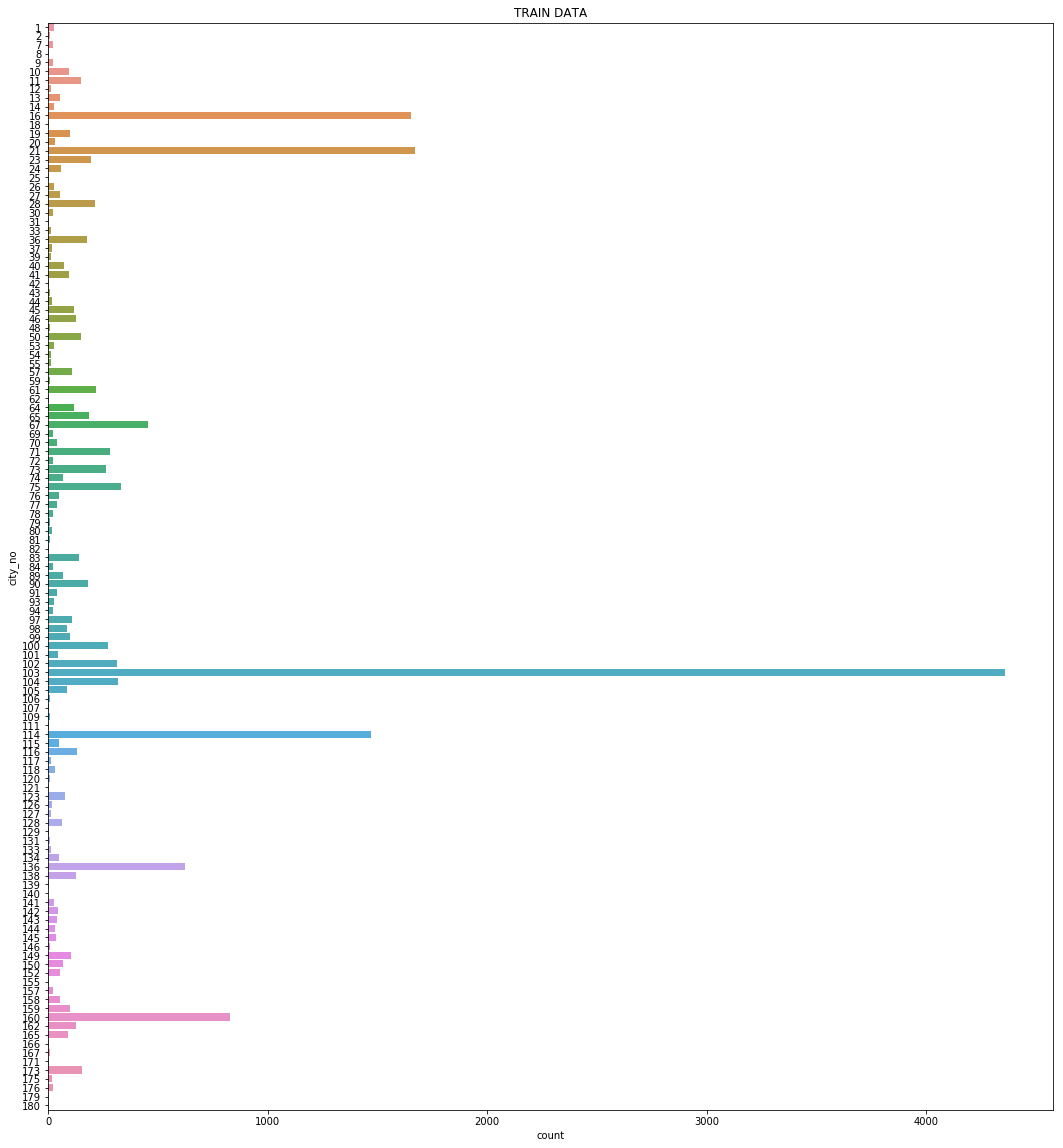

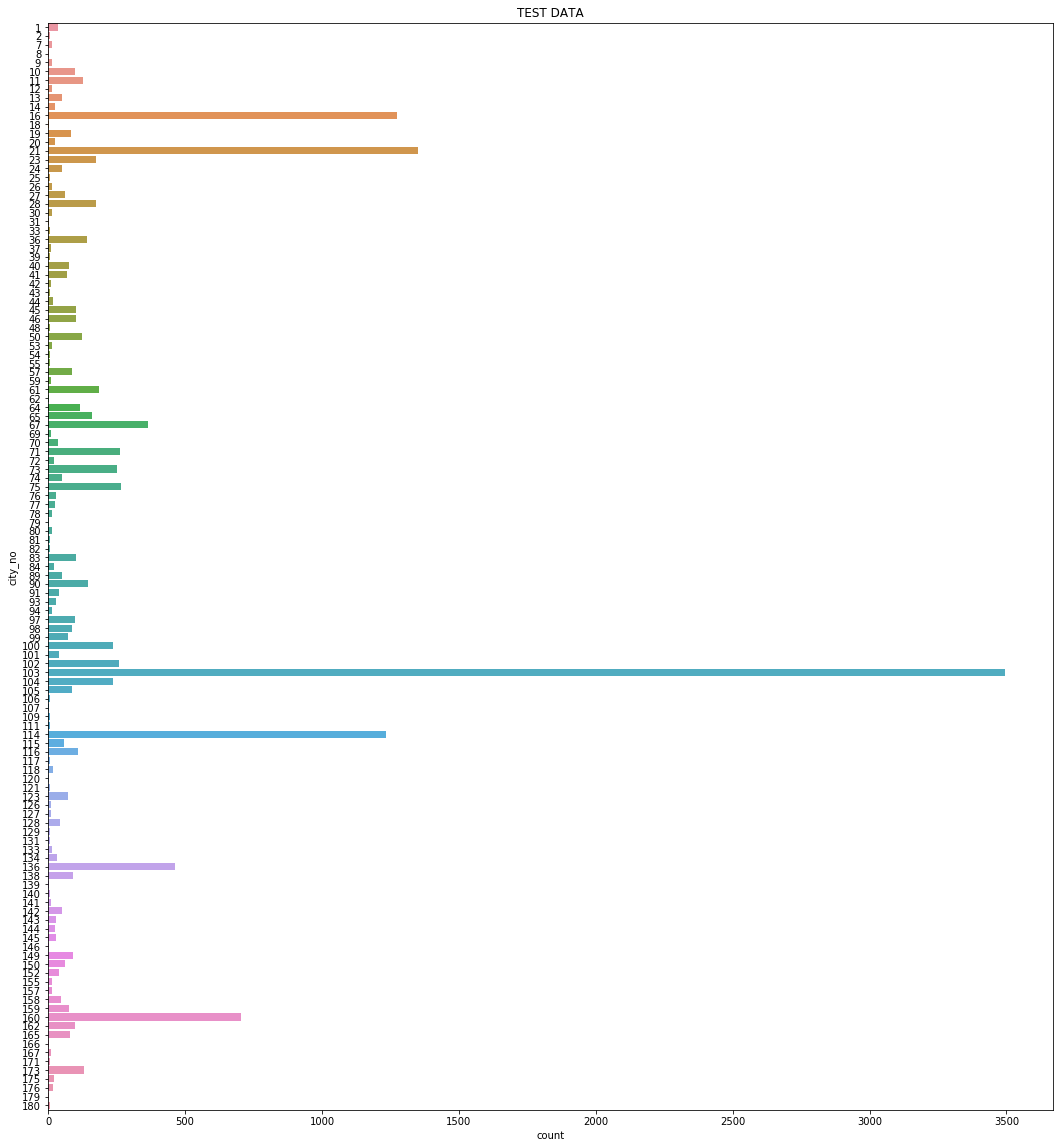

In [33]:
plt.figure(figsize=(18, 20))
sns.countplot(y=train["city_no"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(18, 20))
sns.countplot(y=test["city_no"])
plt.title('TEST DATA')
plt.show()

In [34]:
train["training_hours"].max()

336

In [35]:
test["training_hours"].nunique()

241

(array([ 100.,  347.,  771., 1396., 2355., 3343., 3895., 3475., 1869.,
         808.]),
 array([0.69314718, 1.20584076, 1.71853433, 2.23122791, 2.74392148,
        3.25661506, 3.76930863, 4.28200221, 4.79469578, 5.30738936,
        5.82008293]),
 <a list of 10 Patch objects>)

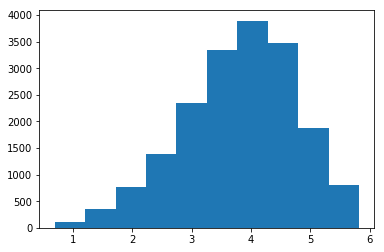

In [36]:
plt.hist(np.log1p(train["training_hours"]))

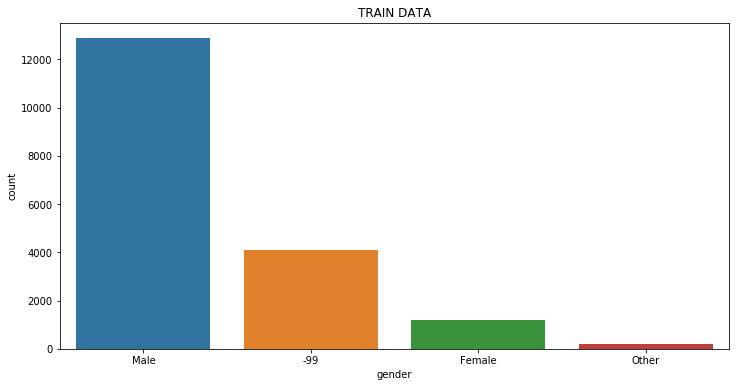

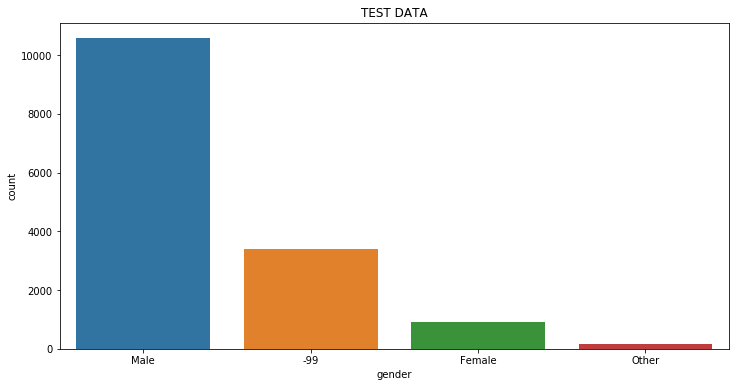

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(train["gender"], order = train["gender"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["gender"], order = test["gender"].value_counts().index)
plt.title('TEST DATA')
plt.show()

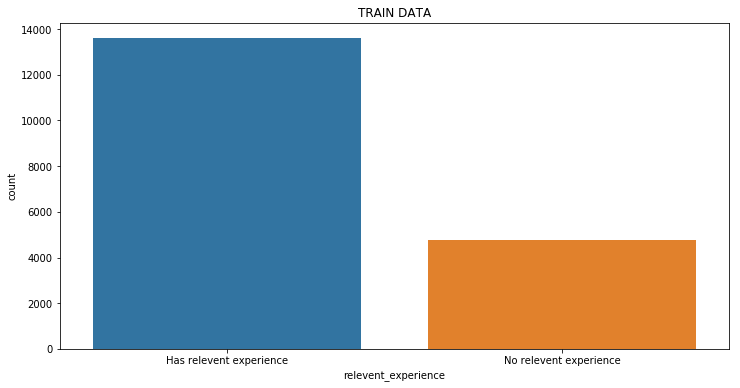

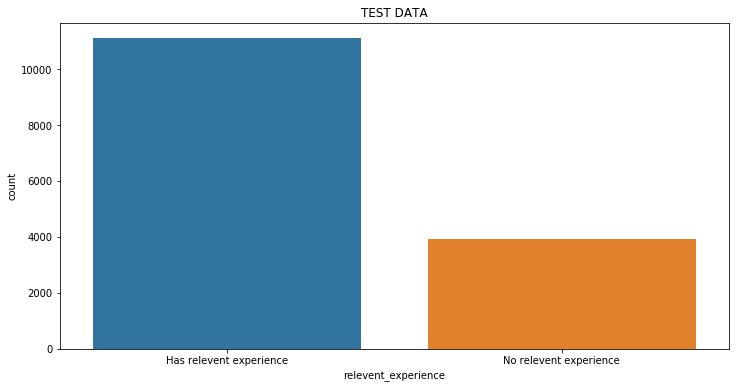

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(train["relevent_experience"], order = train["relevent_experience"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["relevent_experience"], order = test["relevent_experience"].value_counts().index)
plt.title('TEST DATA')
plt.show()

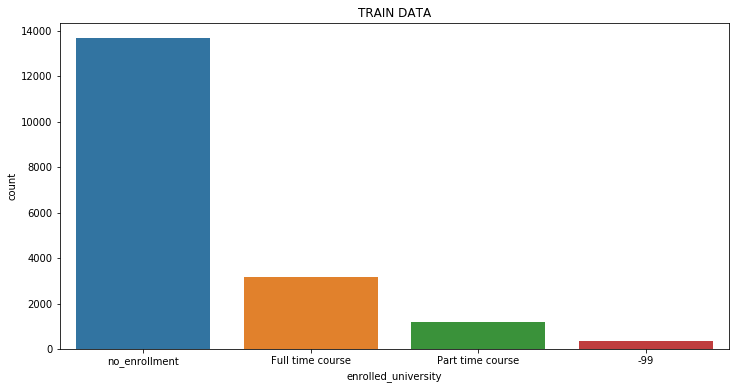

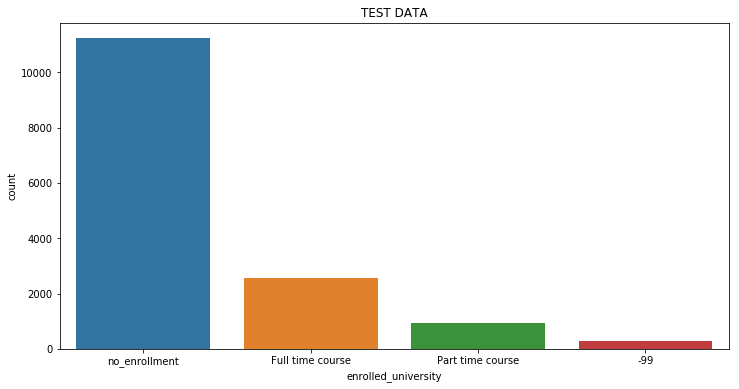

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(train["enrolled_university"], order = train["enrolled_university"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["enrolled_university"], order = test["enrolled_university"].value_counts().index)
plt.title('TEST DATA')
plt.show()

In [42]:
TrainData.loc[TrainData.target == 1, 'enrollee_id']TrainData.loc[TrainData.target == 1, 'enrollee_id']plt.figure(figsize=(12, 6))
sns.countplot(train["education_level"], order = train["education_level"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["education_level"], order = test["education_level"].value_counts().index)
plt.title('TEST DATA')
plt.show()

SyntaxError: invalid syntax (<ipython-input-42-34616e75eb79>, line 1)

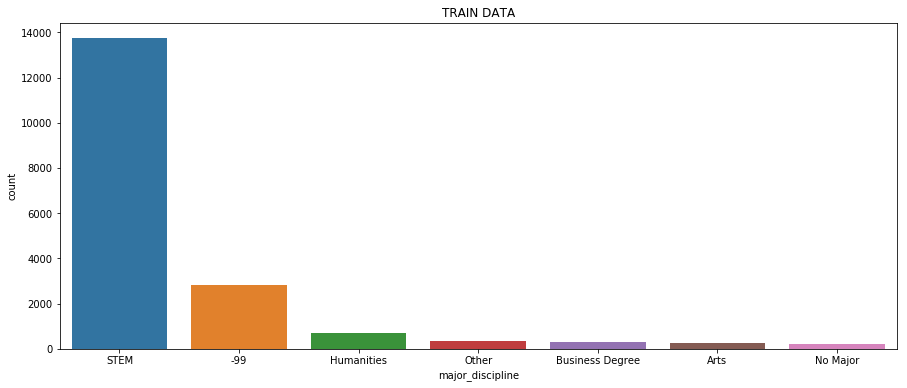

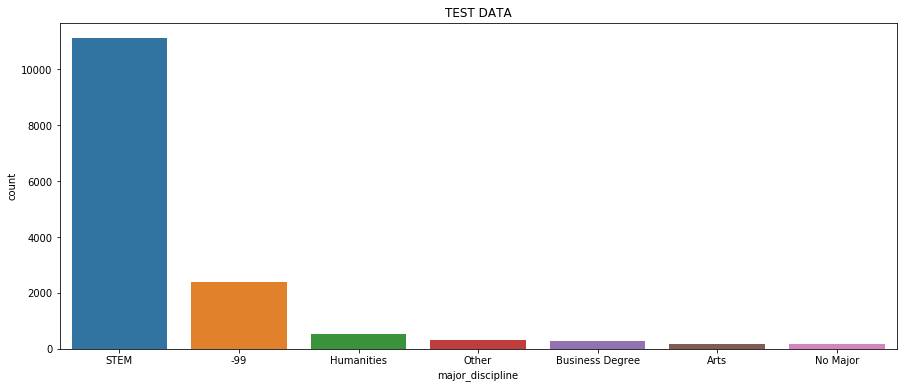

In [43]:
plt.figure(figsize=(15, 6))
sns.countplot(train["major_discipline"], order = train["major_discipline"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["major_discipline"], order = test["major_discipline"].value_counts().index)
plt.title('TEST DATA')
plt.show()

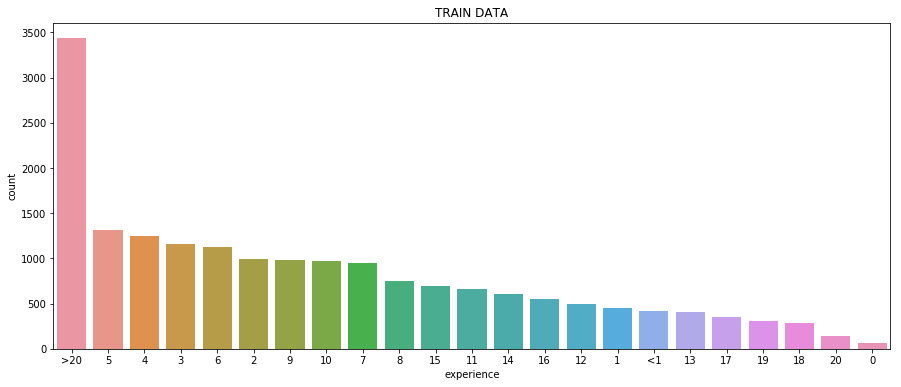

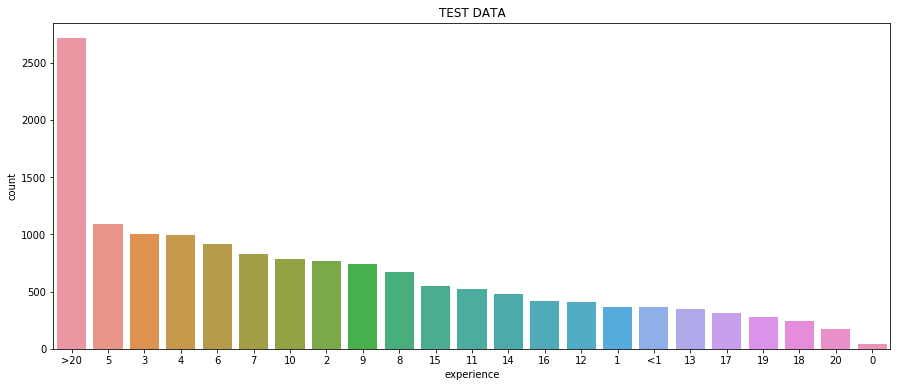

In [44]:
plt.figure(figsize=(15, 6))
sns.countplot(train["experience"], order = train["experience"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["experience"], order = test["experience"].value_counts().index)
plt.title('TEST DATA')
plt.show()

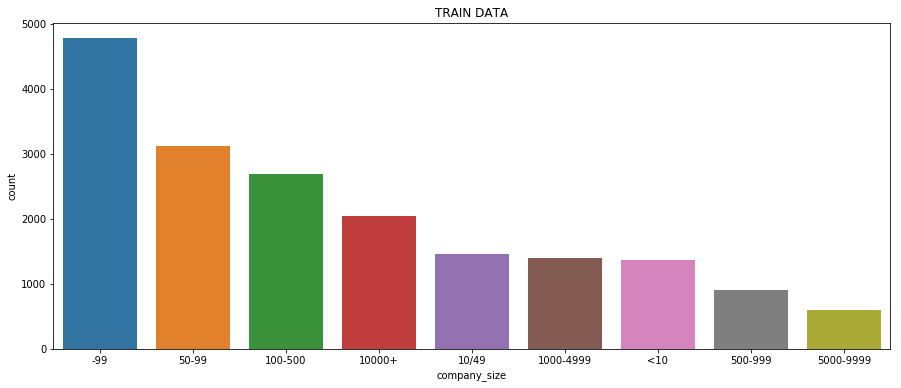

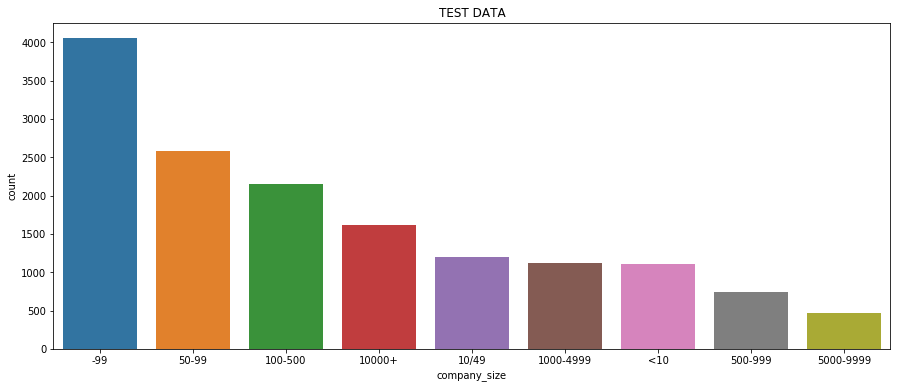

In [45]:
plt.figure(figsize=(15, 6))
sns.countplot(train["company_size"], order = train["company_size"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["company_size"], order = test["company_size"].value_counts().index)
plt.title('TEST DATA')
plt.show()

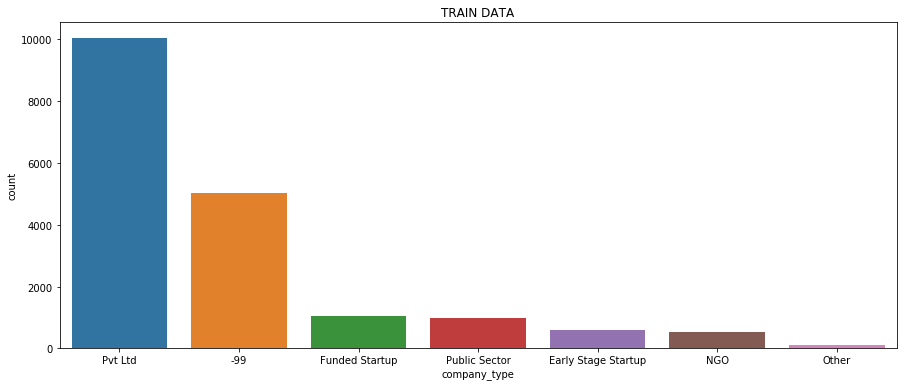

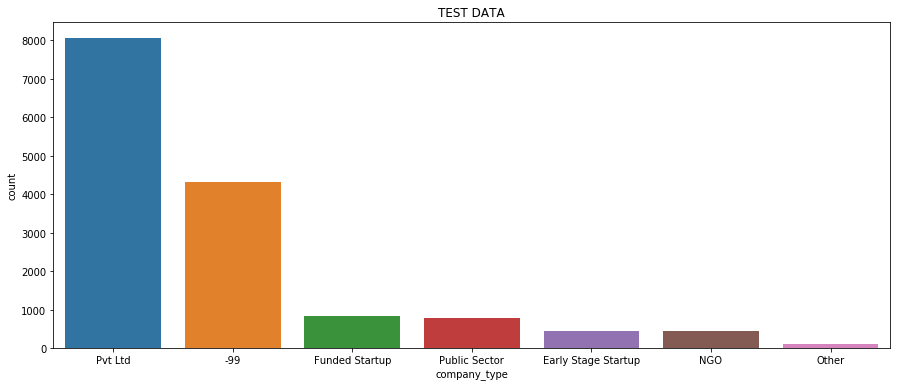

In [46]:
plt.figure(figsize=(15, 6))
sns.countplot(train["company_type"], order = train["company_type"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["company_type"], order = test["company_type"].value_counts().index)
plt.title('TEST DATA')
plt.show()

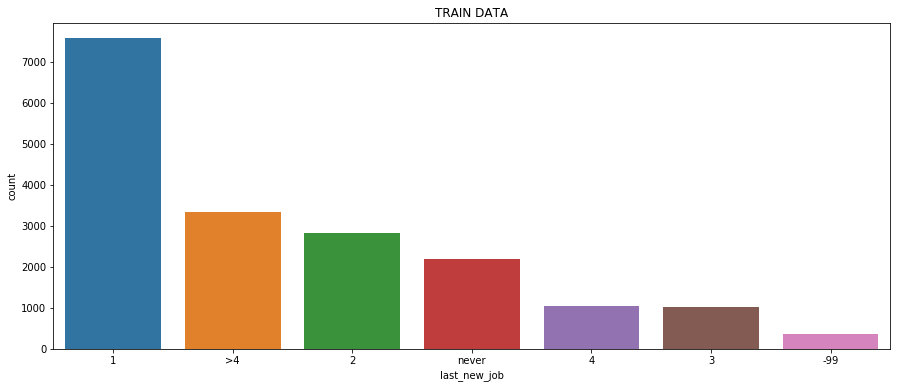

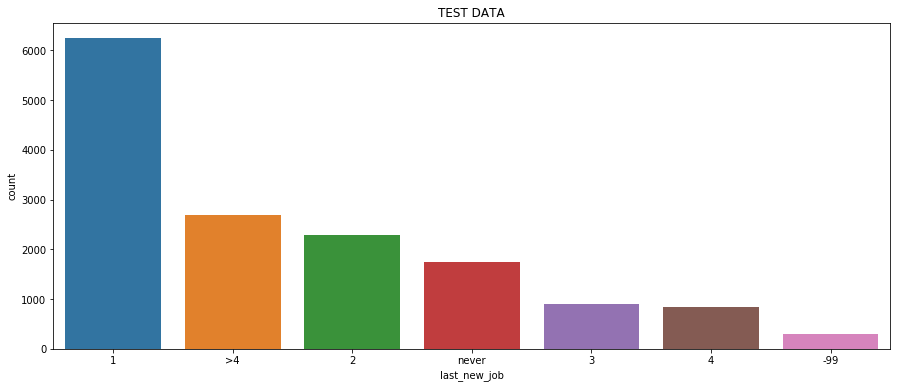

In [47]:
plt.figure(figsize=(15, 6))
sns.countplot(train["last_new_job"], order = train["last_new_job"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["last_new_job"], order = test["last_new_job"].value_counts().index)
plt.title('TEST DATA')
plt.show()

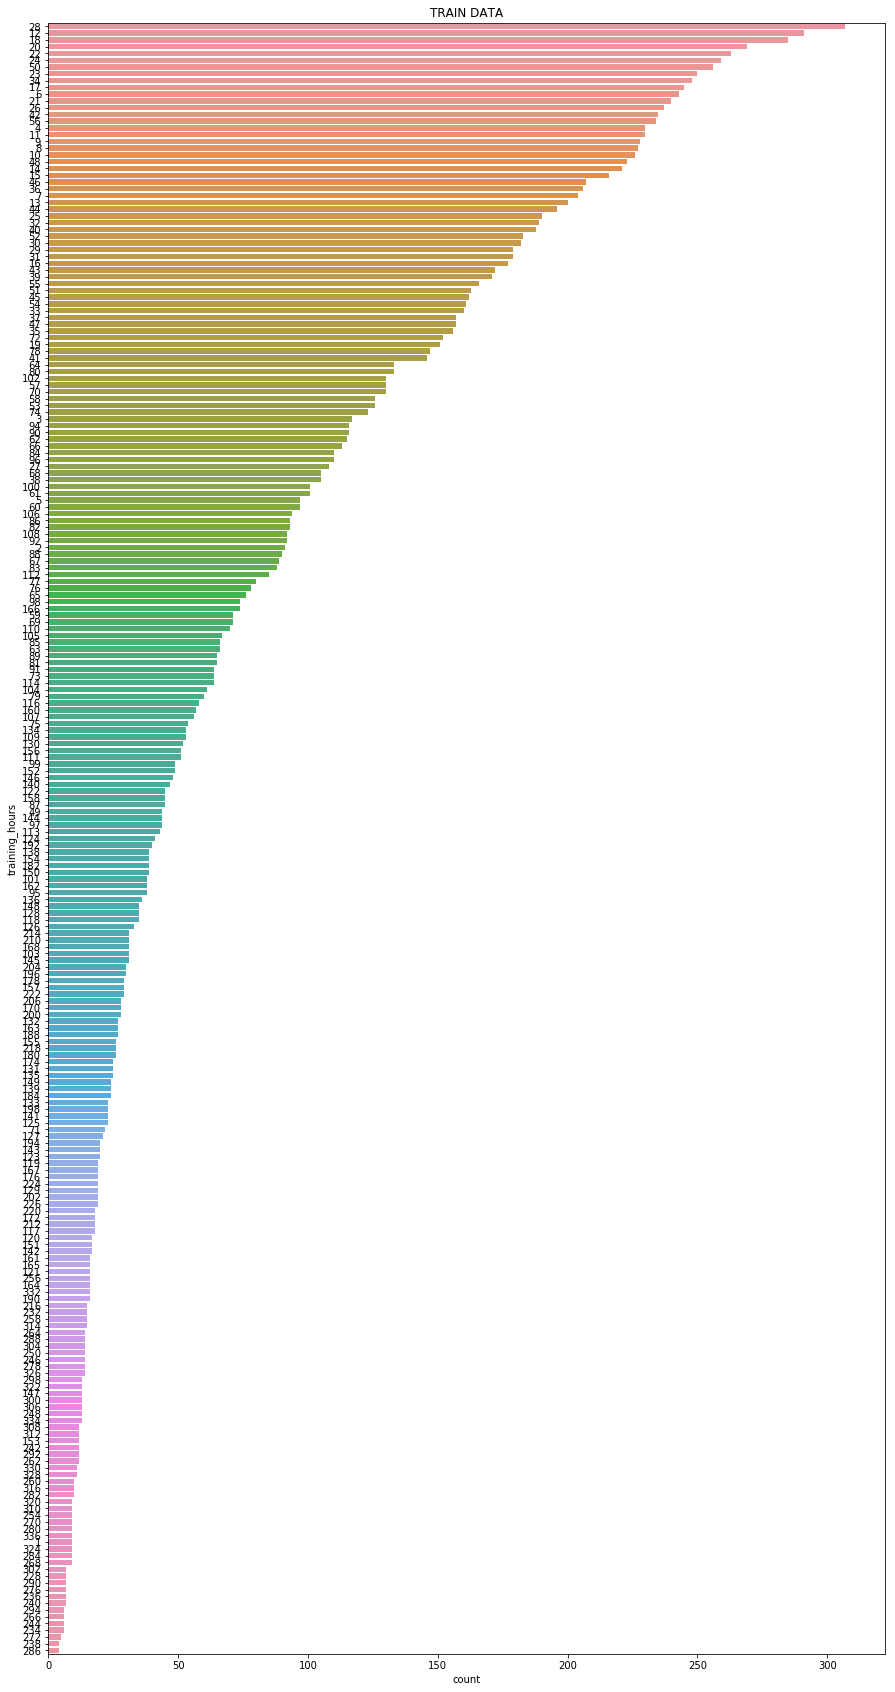

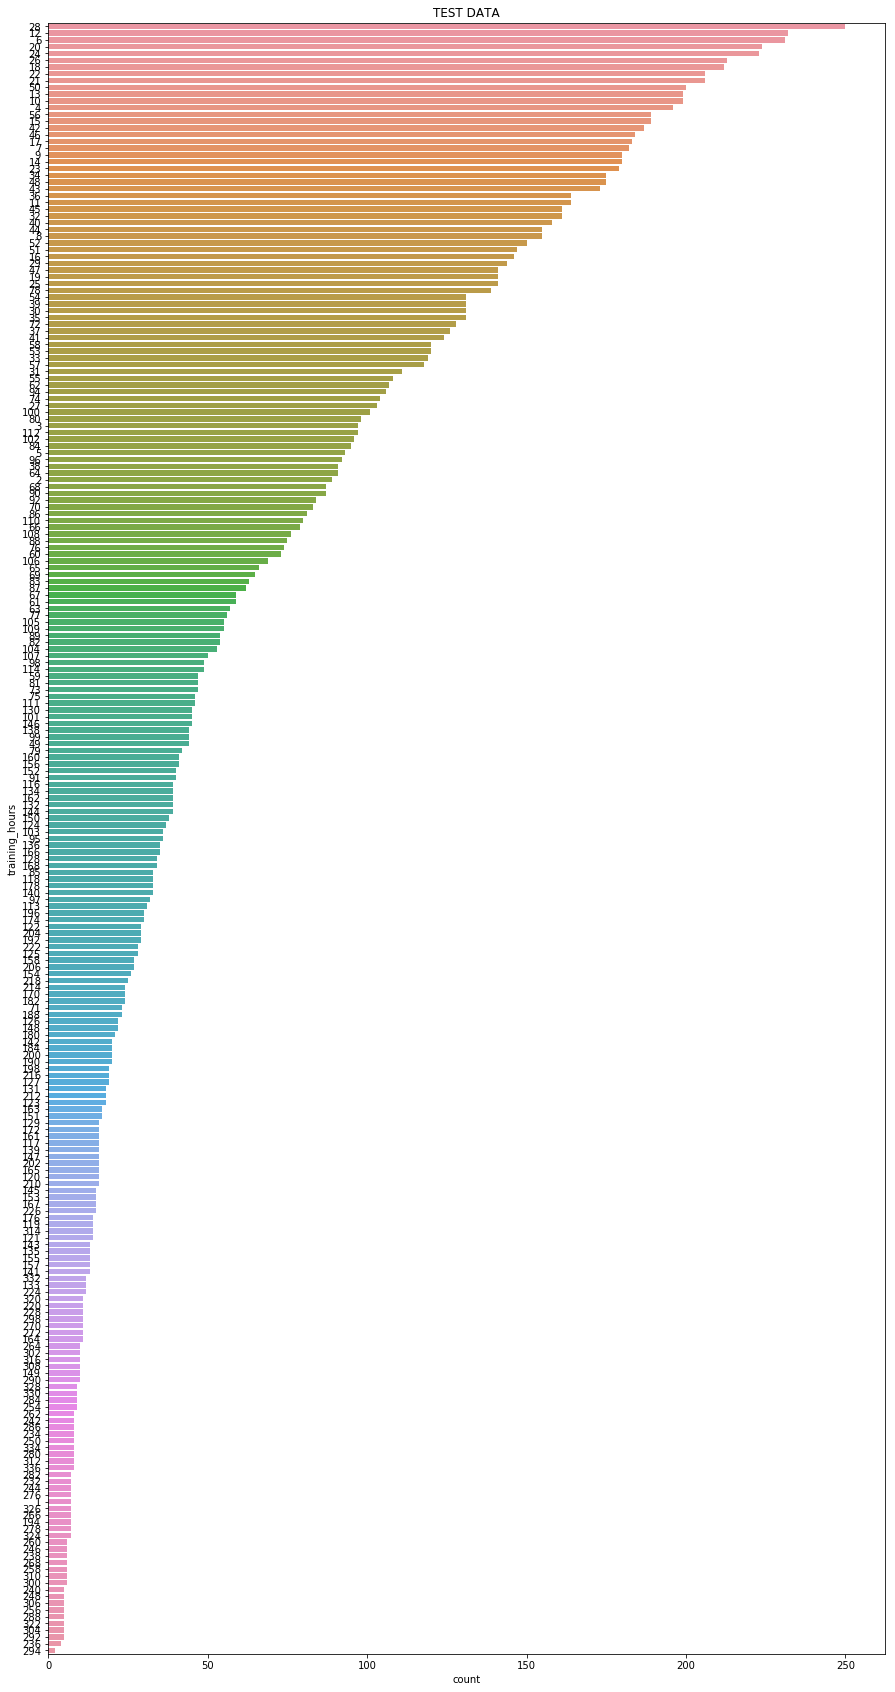

In [48]:
plt.figure(figsize=(15, 30))
sns.countplot(y=train["training_hours"], order = train["training_hours"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 30))
sns.countplot(y=test["training_hours"], order = test["training_hours"].value_counts().index)
plt.title('TEST DATA')
plt.show()

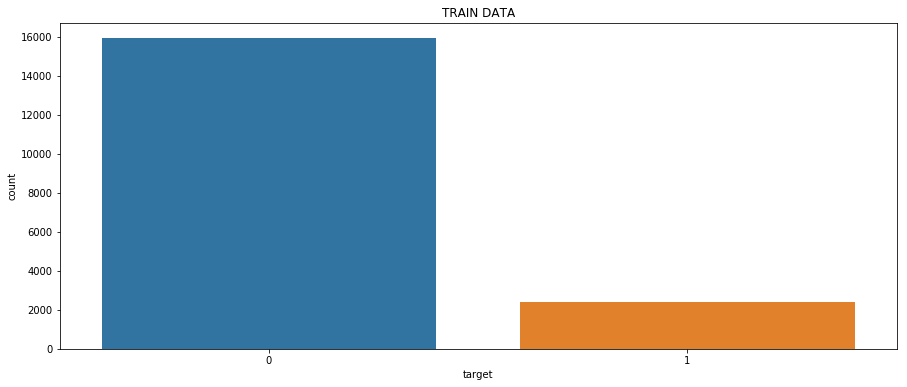

In [49]:
plt.figure(figsize=(15, 6))
sns.countplot(train["target"], order = train["target"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()


# MODEL

In [50]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_no,train_hr_log,train_hr_log_norm
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0,149,4.672829,0.776230
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0,83,4.248495,0.693465
2,46,city_16,0.910,-99,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0,16,1.609438,0.178721
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0,64,3.295837,0.507650
4,21751,city_100,0.887,-99,No relevent experience,no_enrollment,Masters,STEM,8,-99,-99,2,88,1,100,4.488636,0.740304


In [51]:
X_Train = train.drop(['target'], axis=1)
y_Train = train['target']
feat_categ = list(np.where(X_Train.dtypes != np.float)[0])

X_Test = test

In [52]:
# Parameters for catboost manually tuned
num_inter = [200, 400, 500, 600, 700, 800, 1000]
Depth = [4, 5, 6, 7, 8, 10]
alpha = [0.001, 0.01, 0.03, 0.1, 0.3]

In [53]:
X_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,city_no
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,149
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,83
2,46,city_16,0.910,-99,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,16
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,64
4,21751,city_100,0.887,-99,No relevent experience,no_enrollment,Masters,STEM,8,-99,-99,2,88,100


In [54]:
classifier = cb.CatBoostClassifier(iterations=1003, depth=5, learning_rate=0.04, random_seed=1729)
classifier.fit(X_Train, y_Train,cat_features=feat_categ,plot=True, )

0:	learn: 0.6652887	total: 194ms	remaining: 3m 14s
1:	learn: 0.6397746	total: 257ms	remaining: 2m 8s
2:	learn: 0.6170184	total: 310ms	remaining: 1m 43s
3:	learn: 0.5955816	total: 371ms	remaining: 1m 32s
4:	learn: 0.5760230	total: 432ms	remaining: 1m 26s
5:	learn: 0.5585831	total: 465ms	remaining: 1m 17s
6:	learn: 0.5430819	total: 532ms	remaining: 1m 15s
7:	learn: 0.5282413	total: 588ms	remaining: 1m 13s
8:	learn: 0.5146768	total: 659ms	remaining: 1m 12s
9:	learn: 0.5033775	total: 681ms	remaining: 1m 7s
10:	learn: 0.4924467	total: 733ms	remaining: 1m 6s
11:	learn: 0.4831133	total: 753ms	remaining: 1m 2s
12:	learn: 0.4741722	total: 781ms	remaining: 59.5s
13:	learn: 0.4664568	total: 802ms	remaining: 56.7s
14:	learn: 0.4590584	total: 868ms	remaining: 57.2s
15:	learn: 0.4515698	total: 935ms	remaining: 57.7s


MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed_iterations': 15, 'total_iterations': 1003, 'data': {'iterations': [{'learn': [0.6652887199], 'iteration': 0, 'passed_time': 0.1937484274, 'remaining_time': 194.1359243}, {'learn': [0.6397745968], 'iteration': 1, 'passed_time': 0.25704209, 'remaining_time': 128.649566}, {'learn': [0.6170183743], 'iteration': 2, 'passed_time': 0.3103097251, 'remaining_time': 103.436575}, {'learn': [0.5955815638], 'iteration': 3, 'passed_time': 0.371005868, 'remaining_time': 92.65871553}, {'learn': [0.5760229914], 'iteration': 4, 'passed_time': 0.4320241446, 'remaining_time': 86.23201927}, {'learn': [0.558583076], 'iteration': 5, 'passed_time': 0.4653488242, 'remaining_time': 77.32546295}, {'learn': [0.5430819282], 'iteration': 6, 'passed_time': 0.5323058912, 'remaining_time': 75.73952395}, {'learn': [0.5282413242], 'iteration': 7, 'passed_time': 0.5879840049, 'remaining_time': 73.13051061}, {'learn': [0.514676756], 'iteration': 8, 'passed_time': 0.6585147174, 'remaining_time': 72.72929212}, {'learn': [0.5033774528], 'iteration': 9, 'passed_time': 0.6813377244, 'remaining_time': 67.65683603}, {'learn': [0.4924467271], 'iteration': 10, 'passed_time': 0.7327703054, 'remaining_time': 66.08255845}, {'learn': [0.4831133453], 'iteration': 11, 'passed_time': 0.7527641252, 'remaining_time': 62.16577067}, {'learn': [0.4741722235], 'iteration': 12, 'passed_time': 0.7813575656, 'remaining_time': 59.50338384}, {'learn': [0.4664567511], 'iteration': 13, 'passed_time': 0.8022140195, 'remaining_time': 56.67069038}, {'learn': [0.4590583575], 'iteration': 14, 'passed_time': 0.8678837704, 'remaining_time': 57.16461101}, {'learn': [0.451569836], 'iteration': 15, 'passed_time': 0.9347910526, 'remaining_time': 57.66492306}], 'meta': {'launch_mode': 'Train', 'name': 'experiment', 'iteration_count': 1003, 'learn_metrics': [{'best_value': 'Min', 'name': 'Logloss'}], 'test_sets': [], 'test_metrics': [], 'learn_sets': ['learn']}}}}}, layout=Layout(align_self='stretch', height='500px'))

16:	learn: 0.4455843	total: 1.01s	remaining: 58.4s
17:	learn: 0.4400310	total: 1.08s	remaining: 59.4s
18:	learn: 0.4348895	total: 1.15s	remaining: 59.6s
19:	learn: 0.4302708	total: 1.23s	remaining: 1m
20:	learn: 0.4260584	total: 1.32s	remaining: 1m 1s
21:	learn: 0.4219479	total: 1.42s	remaining: 1m 3s
22:	learn: 0.4182267	total: 1.47s	remaining: 1m 2s
23:	learn: 0.4147756	total: 1.56s	remaining: 1m 3s
24:	learn: 0.4120505	total: 1.58s	remaining: 1m 1s
25:	learn: 0.4087021	total: 1.63s	remaining: 1m 1s
26:	learn: 0.4058378	total: 1.7s	remaining: 1m 1s
27:	learn: 0.4033787	total: 1.74s	remaining: 1m
28:	learn: 0.4012280	total: 1.8s	remaining: 1m
29:	learn: 0.3991056	total: 1.92s	remaining: 1m 2s
30:	learn: 0.3968352	total: 2.03s	remaining: 1m 3s
31:	learn: 0.3948126	total: 2.1s	remaining: 1m 3s
32:	learn: 0.3932339	total: 2.18s	remaining: 1m 4s
33:	learn: 0.3917803	total: 2.25s	remaining: 1m 4s
34:	learn: 0.3905687	total: 2.29s	remaining: 1m 3s
35:	learn: 0.3892027	total: 2.35s	remaining

178:	learn: 0.3643563	total: 11.6s	remaining: 53.6s
179:	learn: 0.3643215	total: 11.7s	remaining: 53.5s
180:	learn: 0.3642924	total: 11.8s	remaining: 53.4s
181:	learn: 0.3642593	total: 11.8s	remaining: 53.3s
182:	learn: 0.3642593	total: 11.8s	remaining: 53s
183:	learn: 0.3642593	total: 11.8s	remaining: 52.7s
184:	learn: 0.3642593	total: 11.9s	remaining: 52.5s
185:	learn: 0.3642136	total: 11.9s	remaining: 52.4s
186:	learn: 0.3641291	total: 12s	remaining: 52.3s
187:	learn: 0.3640532	total: 12s	remaining: 52.2s
188:	learn: 0.3640412	total: 12.1s	remaining: 52.1s
189:	learn: 0.3640044	total: 12.2s	remaining: 52s
190:	learn: 0.3639785	total: 12.2s	remaining: 52s
191:	learn: 0.3639785	total: 12.2s	remaining: 51.7s
192:	learn: 0.3639142	total: 12.3s	remaining: 51.6s
193:	learn: 0.3638647	total: 12.4s	remaining: 51.6s
194:	learn: 0.3638258	total: 12.4s	remaining: 51.5s
195:	learn: 0.3638253	total: 12.5s	remaining: 51.3s
196:	learn: 0.3637677	total: 12.5s	remaining: 51.2s
197:	learn: 0.3637677	

337:	learn: 0.3583810	total: 22.9s	remaining: 45.1s
338:	learn: 0.3583175	total: 23s	remaining: 45s
339:	learn: 0.3582680	total: 23s	remaining: 44.9s
340:	learn: 0.3582257	total: 23.1s	remaining: 44.8s
341:	learn: 0.3581929	total: 23.2s	remaining: 44.8s
342:	learn: 0.3581111	total: 23.2s	remaining: 44.7s
343:	learn: 0.3580699	total: 23.3s	remaining: 44.6s
344:	learn: 0.3580340	total: 23.4s	remaining: 44.6s
345:	learn: 0.3580027	total: 23.4s	remaining: 44.5s
346:	learn: 0.3579540	total: 23.5s	remaining: 44.4s
347:	learn: 0.3579487	total: 23.6s	remaining: 44.4s
348:	learn: 0.3579279	total: 23.7s	remaining: 44.4s
349:	learn: 0.3578796	total: 23.8s	remaining: 44.4s
350:	learn: 0.3577860	total: 23.9s	remaining: 44.4s
351:	learn: 0.3577658	total: 24s	remaining: 44.3s
352:	learn: 0.3577541	total: 24.1s	remaining: 44.3s
353:	learn: 0.3577272	total: 24.1s	remaining: 44.3s
354:	learn: 0.3576739	total: 24.2s	remaining: 44.2s
355:	learn: 0.3576631	total: 24.3s	remaining: 44.2s
356:	learn: 0.357631

497:	learn: 0.3527856	total: 44.9s	remaining: 45.5s
498:	learn: 0.3527683	total: 45s	remaining: 45.4s
499:	learn: 0.3527174	total: 45.2s	remaining: 45.4s
500:	learn: 0.3526836	total: 45.3s	remaining: 45.4s
501:	learn: 0.3526613	total: 45.5s	remaining: 45.4s
502:	learn: 0.3526125	total: 45.7s	remaining: 45.4s
503:	learn: 0.3526074	total: 45.9s	remaining: 45.4s
504:	learn: 0.3525892	total: 46s	remaining: 45.3s
505:	learn: 0.3525660	total: 46.1s	remaining: 45.3s
506:	learn: 0.3525479	total: 46.3s	remaining: 45.3s
507:	learn: 0.3525407	total: 46.5s	remaining: 45.3s
508:	learn: 0.3524892	total: 46.6s	remaining: 45.3s
509:	learn: 0.3524737	total: 46.8s	remaining: 45.3s
510:	learn: 0.3524469	total: 47s	remaining: 45.3s
511:	learn: 0.3524324	total: 47.2s	remaining: 45.3s
512:	learn: 0.3524181	total: 47.3s	remaining: 45.2s
513:	learn: 0.3523633	total: 47.4s	remaining: 45.1s
514:	learn: 0.3523294	total: 47.6s	remaining: 45.1s
515:	learn: 0.3522859	total: 47.8s	remaining: 45.1s
516:	learn: 0.3522

658:	learn: 0.3484981	total: 1m 7s	remaining: 35.1s
659:	learn: 0.3484678	total: 1m 7s	remaining: 35.1s
660:	learn: 0.3484478	total: 1m 7s	remaining: 35s
661:	learn: 0.3484150	total: 1m 7s	remaining: 34.9s
662:	learn: 0.3483745	total: 1m 7s	remaining: 34.9s
663:	learn: 0.3483438	total: 1m 8s	remaining: 34.8s
664:	learn: 0.3482878	total: 1m 8s	remaining: 34.7s
665:	learn: 0.3482725	total: 1m 8s	remaining: 34.6s
666:	learn: 0.3482599	total: 1m 8s	remaining: 34.5s
667:	learn: 0.3482190	total: 1m 8s	remaining: 34.5s
668:	learn: 0.3482052	total: 1m 8s	remaining: 34.4s
669:	learn: 0.3481667	total: 1m 9s	remaining: 34.3s
670:	learn: 0.3481261	total: 1m 9s	remaining: 34.2s
671:	learn: 0.3481146	total: 1m 9s	remaining: 34.1s
672:	learn: 0.3480686	total: 1m 9s	remaining: 34s
673:	learn: 0.3480591	total: 1m 9s	remaining: 33.9s
674:	learn: 0.3480496	total: 1m 9s	remaining: 33.8s
675:	learn: 0.3480338	total: 1m 9s	remaining: 33.7s
676:	learn: 0.3480299	total: 1m 9s	remaining: 33.5s
677:	learn: 0.34

814:	learn: 0.3447479	total: 1m 26s	remaining: 20s
815:	learn: 0.3447308	total: 1m 26s	remaining: 19.9s
816:	learn: 0.3447261	total: 1m 26s	remaining: 19.8s
817:	learn: 0.3446897	total: 1m 27s	remaining: 19.7s
818:	learn: 0.3446627	total: 1m 27s	remaining: 19.6s
819:	learn: 0.3446516	total: 1m 27s	remaining: 19.5s
820:	learn: 0.3446354	total: 1m 27s	remaining: 19.3s
821:	learn: 0.3446221	total: 1m 27s	remaining: 19.2s
822:	learn: 0.3445967	total: 1m 27s	remaining: 19.1s
823:	learn: 0.3445941	total: 1m 27s	remaining: 19s
824:	learn: 0.3445851	total: 1m 27s	remaining: 18.9s
825:	learn: 0.3445110	total: 1m 27s	remaining: 18.8s
826:	learn: 0.3445083	total: 1m 27s	remaining: 18.7s
827:	learn: 0.3444948	total: 1m 28s	remaining: 18.6s
828:	learn: 0.3444573	total: 1m 28s	remaining: 18.5s
829:	learn: 0.3444468	total: 1m 28s	remaining: 18.4s
830:	learn: 0.3444171	total: 1m 28s	remaining: 18.3s
831:	learn: 0.3444131	total: 1m 28s	remaining: 18.2s
832:	learn: 0.3443676	total: 1m 28s	remaining: 18.

970:	learn: 0.3416114	total: 1m 42s	remaining: 3.36s
971:	learn: 0.3415959	total: 1m 42s	remaining: 3.26s
972:	learn: 0.3415649	total: 1m 42s	remaining: 3.16s
973:	learn: 0.3415419	total: 1m 42s	remaining: 3.05s
974:	learn: 0.3415308	total: 1m 42s	remaining: 2.94s
975:	learn: 0.3415125	total: 1m 42s	remaining: 2.84s
976:	learn: 0.3414757	total: 1m 42s	remaining: 2.73s
977:	learn: 0.3414561	total: 1m 42s	remaining: 2.63s
978:	learn: 0.3414405	total: 1m 42s	remaining: 2.52s
979:	learn: 0.3414226	total: 1m 42s	remaining: 2.42s
980:	learn: 0.3414134	total: 1m 43s	remaining: 2.31s
981:	learn: 0.3413827	total: 1m 43s	remaining: 2.21s
982:	learn: 0.3413482	total: 1m 43s	remaining: 2.1s
983:	learn: 0.3413174	total: 1m 43s	remaining: 2s
984:	learn: 0.3413059	total: 1m 43s	remaining: 1.89s
985:	learn: 0.3413041	total: 1m 43s	remaining: 1.78s
986:	learn: 0.3413002	total: 1m 43s	remaining: 1.68s
987:	learn: 0.3412965	total: 1m 43s	remaining: 1.57s
988:	learn: 0.3412616	total: 1m 43s	remaining: 1.4

In [55]:
y_Te = classifier.predict_proba(X_Test.values)[:,1]

In [56]:
sub = pd.DataFrame({'enrollee_id': TestData["enrollee_id"], 'target': y_Te})
filename = 'Sub_final.csv'
sub.to_csv(filename, index=False)

In [270]:
# 68.46 no all new feat with orem with median() 1.6 cb.CatBoostClassifier(iterations=1003, depth=5, learning_rate=0.04, random_seed=1729)